In [97]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("D:/大数据/实验二/bank.csv")
cols = df.columns.values
cols = [col.replace('\"','') for col in cols[0].split(';')]
print(cols)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [98]:
datas = []
for i in range(len(df)):
    s = df.iloc[i].values[0]
    datas.append([item.replace('\"','') for item in s.split(';')])
datas = np.array(datas)
print(datas)

[['30' 'unemployed' 'married' ... '0' 'unknown' 'no']
 ['33' 'services' 'married' ... '4' 'failure' 'no']
 ['35' 'management' 'single' ... '1' 'failure' 'no']
 ...
 ['57' 'technician' 'married' ... '0' 'unknown' 'no']
 ['28' 'blue-collar' 'married' ... '3' 'other' 'no']
 ['44' 'entrepreneur' 'single' ... '7' 'other' 'no']]


In [99]:
df_frame = {}
for i in range(len(cols)):
    df_frame[cols[i]] = datas[:,i]
df = pd.DataFrame(df_frame)
print(df)

     age            job   marital  education default balance housing loan  \
0     30     unemployed   married    primary      no    1787      no   no   
1     33       services   married  secondary      no    4789     yes  yes   
2     35     management    single   tertiary      no    1350     yes   no   
3     30     management   married   tertiary      no    1476     yes  yes   
4     59    blue-collar   married  secondary      no       0     yes   no   
5     35     management    single   tertiary      no     747      no   no   
6     36  self-employed   married   tertiary      no     307     yes   no   
7     39     technician   married  secondary      no     147     yes   no   
8     41   entrepreneur   married   tertiary      no     221     yes   no   
9     43       services   married    primary      no     -88     yes  yes   
10    39       services   married  secondary      no    9374     yes   no   
11    43         admin.   married  secondary      no     264     yes   no   

In [100]:
df[['age','balance','duration','campaign','pdays','previous']] = df[['age','balance','duration','campaign','pdays','previous']].astype(int)
df.dtypes

age           int32
job          object
marital      object
education    object
default      object
balance       int32
housing      object
loan         object
contact      object
day          object
month        object
duration      int32
campaign      int32
pdays         int32
previous      int32
poutcome     object
y            object
dtype: object

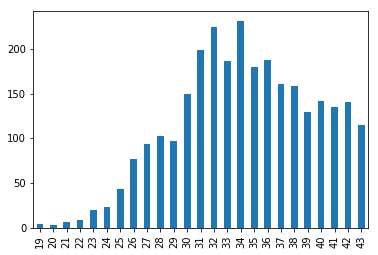

In [101]:
df['age'].value_counts().sort_index().head(25).plot.bar()

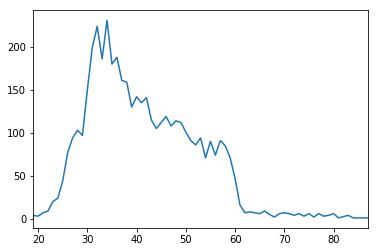

In [102]:
df['age'].value_counts().sort_index().plot.line()

In [103]:
df.dupl)cated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4491    False
4492    False
4493    False
4494    False
4495    False
4496    False
4497    False
4498    False
4499    False
4500    False
4501    False
4502    False
4503    False
4504    False
4505    False
4506    False
4507    False
4508    False
4509    False
4510    False
4511    False
4512    False
4513    False
4514    False
4515    False
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [104]:
class_mapping = {'no':0, 'yes':1}
df['default'] = df['default'].map(class_mapping)
df['housing'] = df['housing'].map(class_mapping)
df['loan'] = df['loan'].map(class_mapping)
df['y'] = df['y'].map(class_mapping)

In [105]:
month_dict = {'oct': '10', 'may': '05', 'apr': '04','jun': '06', 'feb': '02', 'aug': '08', 
'jan': '01', 'jul': '07', 'nov': '11', 'sep': '09', 'mar': '03', 'dec': '12'}
df['month'] = df['month'].map(month_dict)
df['date'] = '2019' + '-' + df['month'] + '-' + df['day']
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df['date'] = pd.to_datetime('2020-01-01', format="%Y-%m-%d") - df['date']
print(df['date'])

0       74 days
1      235 days
2      260 days
3      212 days
4      241 days
5      312 days
6      232 days
7      240 days
8      232 days
9      259 days
10     226 days
11     259 days
12     141 days
13     246 days
14     337 days
15     125 days
16     127 days
17     256 days
18     223 days
19     178 days
20      44 days
21      43 days
22     203 days
23     178 days
24     336 days
25      42 days
26     241 days
27     137 days
28     155 days
29     133 days
         ...   
4491   260 days
4492   260 days
4493   211 days
4494   218 days
4495    44 days
4496   157 days
4497    42 days
4498   219 days
4499    41 days
4500   234 days
4501   128 days
4502   330 days
4503   156 days
4504   233 days
4505   220 days
4506   125 days
4507   259 days
4508   230 days
4509    32 days
4510   226 days
4511   231 days
4512   217 days
4513   140 days
4514   256 days
4515   178 days
4516   155 days
4517   237 days
4518   135 days
4519   329 days
4520   273 days
Name: date, Length: 4521

In [106]:
del(df['day'])
del(df['month'])

In [107]:
jobs = df['job'].unique()
job_mapping = {jobs[i]: i for i in range(jobs.shape[0])}

maritals = df['marital'].unique()
marital_mapping = {maritals[i]: i for i in range(maritals.shape[0])}

educations = df['education'].unique()
education_mapping = {educations[i]: i for i in range(educations.shape[0])}

contacts = df['contact'].unique()
contact_mapping = {contacts[i]: i for i in range(contacts.shape[0])}

poutcomes = df['poutcome'].unique()
poutcome_mapping = {poutcomes[i]: i for i in range(poutcomes.shape[0])}

df['marital'] = df['marital'].map(marital_mapping)
df['job'] = df['job'].map(job_mapping)
df['education'] = df['education'].map(education_mapping)
df['contact'] = df['contact'].map(contact_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,30,0,0,0,0,1787,0,0,0,79,1,-1,0,0,0,74 days
1,33,1,0,1,0,4789,1,1,0,220,1,339,4,1,0,235 days
2,35,2,1,2,0,1350,1,0,0,185,1,330,1,1,0,260 days
3,30,2,0,2,0,1476,1,1,1,199,4,-1,0,0,0,212 days
4,59,3,0,1,0,0,1,0,1,226,1,-1,0,0,0,241 days
5,35,2,1,2,0,747,0,0,0,141,2,176,3,1,0,312 days
6,36,4,0,2,0,307,1,0,0,341,1,330,2,2,0,232 days
7,39,5,0,1,0,147,1,0,0,151,2,-1,0,0,0,240 days
8,41,6,0,2,0,221,1,0,1,57,2,-1,0,0,0,232 days
9,43,1,0,0,0,-88,1,1,0,313,1,147,2,1,0,259 days


In [108]:
bins = [18, 25, 35, 45, 55, 100]    # 指定年龄的分界点
df['age'] = pd.cut(df['age'], bins, labels=False)
bins = [-np.inf, 4137.1, 11587.2, np.inf]
df['balance'] = pd.cut(df['balance'], bins, labels=False)
print(df[['age','balance']])

      age  balance
0       1        0
1       1        1
2       1        0
3       1        0
4       4        0
5       1        0
6       2        0
7       2        0
8       2        0
9       2        0
10      2        1
11      2        0
12      2        0
13      0        0
14      1        0
15      2        0
16      4        0
17      2        0
18      0        0
19      1        0
20      2        0
21      2        0
22      2        0
23      2        0
24      1        0
25      2        1
26      3        0
27      4        0
28      4        0
29      3        0
...   ...      ...
4491    1        0
4492    1        0
4493    1        0
4494    1        0
4495    3        0
4496    1        0
4497    1        0
4498    1        0
4499    2        0
4500    2        1
4501    1        0
4502    2        0
4503    4        0
4504    2        0
4505    1        0
4506    2        0
4507    1        0
4508    2        0
4509    3        0
4510    2        0
4511    3   

In [109]:
cols = ['pdays', 'duration', 'campaign', 'date']
for col in cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
print(df[['pdays', 'duration', 'campaign', 'date']])

         pdays  duration  campaign      date
0     0.000000  0.024826  0.000000  0.203911
1     0.389908  0.071500  0.000000  0.653631
2     0.379587  0.059914  0.000000  0.723464
3     0.000000  0.064548  0.061224  0.589385
4     0.000000  0.073486  0.000000  0.670391
5     0.202982  0.045349  0.020408  0.868715
6     0.379587  0.111552  0.000000  0.645251
7     0.000000  0.048659  0.020408  0.667598
8     0.000000  0.017544  0.020408  0.645251
9     0.169725  0.102284  0.000000  0.720670
10    0.000000  0.089043  0.000000  0.628492
11    0.000000  0.036081  0.020408  0.720670
12    0.000000  0.107249  0.020408  0.391061
13    0.000000  0.085071  0.000000  0.684358
14    0.277523  0.028136  0.000000  0.938547
15    0.000000  0.061238  0.020408  0.346369
16    0.000000  0.077789  0.081633  0.351955
17    0.175459  0.036412  0.000000  0.712291
18    0.000000  0.081430  0.000000  0.620112
19    0.175459  0.047666  0.000000  0.494413
20    0.000000  0.030453  0.020408  0.120112
21    0.00

In [110]:
df.to_csv('D:/大数据/实验二/after_bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,1,0,0,0,0,0,0,0,0,0.024826,0.000000,0.000000,0,0,0,0.203911
1,1,1,0,1,0,1,1,1,0,0.071500,0.000000,0.389908,4,1,0,0.653631
2,1,2,1,2,0,0,1,0,0,0.059914,0.000000,0.379587,1,1,0,0.723464
3,1,2,0,2,0,0,1,1,1,0.064548,0.061224,0.000000,0,0,0,0.589385
4,4,3,0,1,0,0,1,0,1,0.073486,0.000000,0.000000,0,0,0,0.670391
5,1,2,1,2,0,0,0,0,0,0.045349,0.020408,0.202982,3,1,0,0.868715
6,2,4,0,2,0,0,1,0,0,0.111552,0.000000,0.379587,2,2,0,0.645251
7,2,5,0,1,0,0,1,0,0,0.048659,0.020408,0.000000,0,0,0,0.667598
8,2,6,0,2,0,0,1,0,1,0.017544,0.020408,0.000000,0,0,0,0.645251
9,2,1,0,0,0,0,1,1,0,0.102284,0.000000,0.169725,2,1,0,0.720670


In [111]:
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
# 读取数据
df = pd.read_csv('D:/大数据/实验二/after_bank.csv')
df = df.iloc[:,1:]
cols = list(df.columns.values)
cols.remove('y')
X = df[cols]
y = df[['y']]

In [112]:
# 划分训练集和测试集
X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:5000]
y_test = y[4000:5000]

In [113]:
dtc = DTC(criterion='entropy', max_depth=5) # 基于信息熵
dtc.fit(X_train, y_train)
print('准确率：', dtc.score(X_test, y_test))

准确率： 0.8886756238003839


In [114]:
dtc = DTC(criterion='gini', max_depth=5)    # 基于基尼系数
dtc.fit(X_train, y_train)
print('准确率：', dtc.score(X_test, y_test))

准确率： 0.9001919385796545


In [115]:
for depth in range(1, 10):
    dtc = DTC(criterion='entropy', max_depth=depth) # 基于信息熵
    dtc.fit(X_train, y_train)
    print('depth:', depth, '|', '准确率:', dtc.score(X_test, y_test))

depth: 1 | 准确率: 0.8790786948176583
depth: 2 | 准确率: 0.8714011516314779
depth: 3 | 准确率: 0.8925143953934741
depth: 4 | 准确率: 0.8905950095969289
depth: 5 | 准确率: 0.8886756238003839
depth: 6 | 准确率: 0.8809980806142035
depth: 7 | 准确率: 0.8925143953934741
depth: 8 | 准确率: 0.8925143953934741
depth: 9 | 准确率: 0.8944337811900192


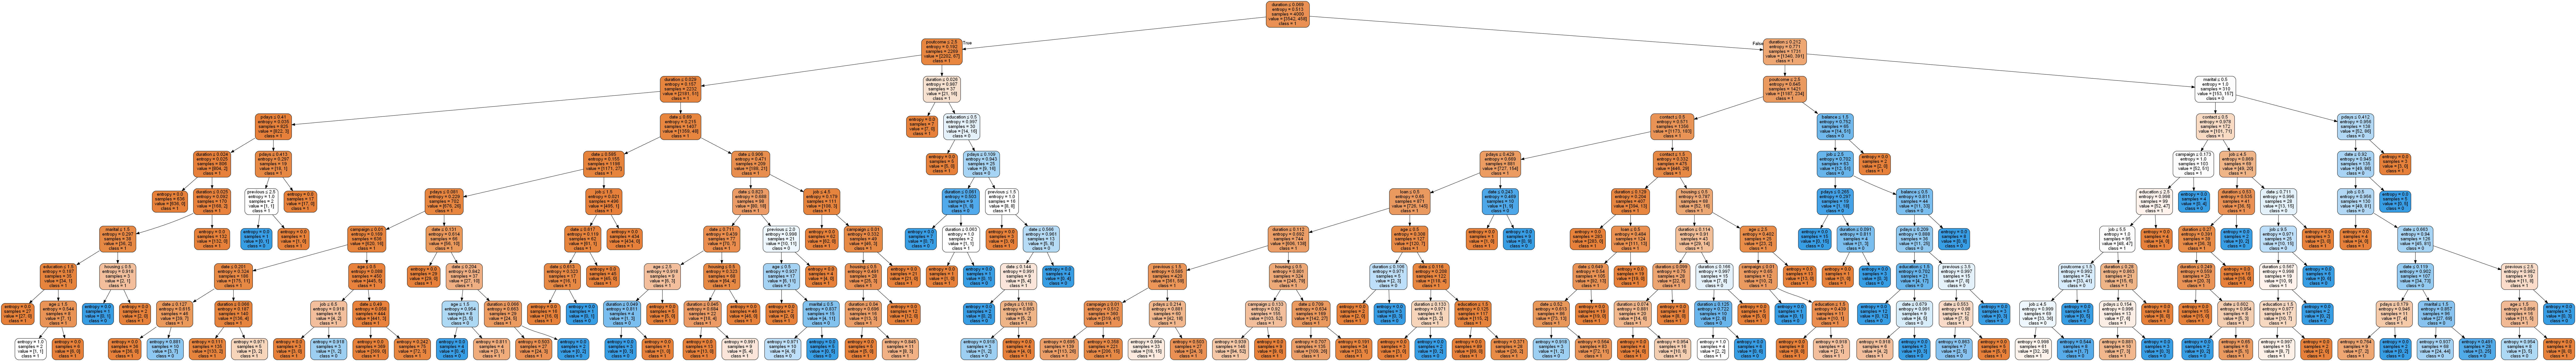

In [116]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz 2.44.1/bin/"
dot_data = tree.export_graphviz(dtc, out_file=None,
                        feature_names=X_train.columns,
                        class_names=['1', '0'],
                        filled=True, rounded=True,
                        special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("D:/大数据/实验二/DecisionTree.gif")

Image(graph.create_png())